In [3]:
from google.colab import files

files.upload()

Saving GOOG.csv to GOOG.csv


{'GOOG.csv': b'Date,Open,High,Low,Close,Adj Close,Volume\n2015-09-04,600.000000,603.469971,595.250000,600.700012,600.700012,2089000\n2015-09-08,612.489990,616.309998,604.119995,614.659973,614.659973,2279500\n2015-09-09,621.219971,626.520020,609.599976,612.719971,612.719971,1702100\n2015-09-10,613.099976,624.159973,611.429993,621.349976,621.349976,1905300\n2015-09-11,619.750000,625.780029,617.419983,625.770020,625.770020,1373500\n2015-09-14,625.700012,625.859985,619.429993,623.239990,623.239990,1702300\n2015-09-15,626.700012,638.700012,623.780029,635.140015,635.140015,2084400\n2015-09-16,635.469971,637.950012,632.320007,635.979980,635.979980,1286500\n2015-09-17,637.789978,650.900024,635.020020,642.900024,642.900024,2274700\n2015-09-18,636.789978,640.000000,627.020020,629.250000,629.250000,5133400\n2015-09-21,634.400024,636.489990,625.940002,635.440002,635.440002,1788500\n2015-09-22,627.000000,627.549988,615.429993,622.690002,622.690002,2562900\n2015-09-23,622.049988,628.929993,620.00000

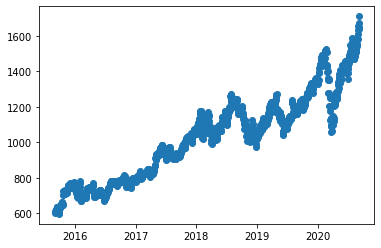

In [11]:
import pandas

dataframe = pandas.read_csv("GOOG.csv")

stock_open_value = dataframe.iloc[:,1:2]

training_values  = stock_open_value[:960].values

testing_values   = stock_open_value[960:].values

training_values.shape

testing_values.shape

dates = pandas.to_datetime(dataframe["Date"])

import matplotlib.pyplot as pyplot

pyplot.plot_date(dates, 
                 stock_open_value)

In [18]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

training_values_scaled = scaler.fit_transform(training_values)

X_train = []
y_train = []

for index in range(50, 960):

  X_train.append(training_values_scaled[index-50:index,
                                        0])
  
  y_train.append(training_values_scaled[index,
                                        0])
  
import numpy

X_train = numpy.array(X_train)
y_train = numpy.array(y_train)

X_train.shape

X_train = numpy.reshape(X_train,
                       (X_train.shape[0],
                        X_train.shape[1],
                        1))

X_train.shape
y_train.shape

(910,)

In [19]:
from keras import Sequential
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Dense

sequential = Sequential()

sequential.add(LSTM(units = 50,
                    return_sequences = True,
                    input_shape = (X_train.shape[1],
                                   1)))

sequential.add(Dropout(0.2))

sequential.add(LSTM(units = 50,
                    return_sequences = True))

sequential.add(Dropout(0.2))

sequential.add(LSTM(units = 50,
                    return_sequences = True))

sequential.add(Dropout(0.2))

sequential.add(LSTM(units = 50,
                    return_sequences = True))

sequential.add(Dropout(0.2))

sequential.add(Dense(units = 1))

sequential.compile(optimizer = "adam",
                   loss = "mean_squared_error")

sequential.fit(X_train,
               y_train,
               epochs     = 18,
               batch_size = 1,
               verbose    = 2)

Epoch 1/18
910/910 - 9s - loss: 0.0238
Epoch 2/18
910/910 - 9s - loss: 0.0122
Epoch 3/18
910/910 - 9s - loss: 0.0098
Epoch 4/18
910/910 - 9s - loss: 0.0088
Epoch 5/18
910/910 - 9s - loss: 0.0081
Epoch 6/18
910/910 - 9s - loss: 0.0079
Epoch 7/18
910/910 - 9s - loss: 0.0077
Epoch 8/18
910/910 - 9s - loss: 0.0076
Epoch 9/18
910/910 - 9s - loss: 0.0073
Epoch 10/18
910/910 - 9s - loss: 0.0068
Epoch 11/18
910/910 - 9s - loss: 0.0070
Epoch 12/18
910/910 - 9s - loss: 0.0065
Epoch 13/18
910/910 - 9s - loss: 0.0064
Epoch 14/18
910/910 - 9s - loss: 0.0061
Epoch 15/18
910/910 - 9s - loss: 0.0059
Epoch 16/18
910/910 - 9s - loss: 0.0061
Epoch 17/18
910/910 - 9s - loss: 0.0057
Epoch 18/18
910/910 - 9s - loss: 0.0058
